In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from scipy.stats import wilcoxon

import joblib


In [2]:
## measuresments include: mean, std, min, 25perc, median, 75perc, max
## observations are precisions
def get_measurements(ptype_prec):
    res = []
    res.append(np.mean(np.array(ptype_prec)))
    res.append(np.std(np.array(ptype_prec)))
    res.append(np.min(np.array(ptype_prec)))
    res.append(np.percentile(np.array(ptype_prec), 25))
    res.append(np.percentile(np.array(ptype_prec), 50))
    res.append(np.percentile(np.array(ptype_prec), 75))
    res.append(np.max(np.array(ptype_prec)))
    return np.array(res)


In [3]:
final_prec = {
    "Lasso FS+Logistic Regression":[0.7538461538461538, 0.7575757575757576, 0.74, 0.7575757575757576, 0.7424242424242424],
    "ICA+SVM":[0.78, 0.7758620689655172, 0.7758620689655172, 0.7678571428571429, 0.7678571428571429],
    "Lasso FS+GTB":[0.803030303030303, 0.8064516129032258, 0.7735849056603774, 0.7735849056603774, 0.75],
    "MLP":[0.775, 0.7857142857142857, 0.80104234, 0.7685714285714286, 0.719304347826086]
}

mms_dict = {}

for key in final_prec:
    ms = get_measurements(final_prec[key])
    mms_dict[key] = ms
print(mms_dict)

{'Lasso FS+Logistic Regression': array([0.75028438, 0.00757053, 0.74      , 0.74242424, 0.75384615,
       0.75757576, 0.75757576]), 'ICA+SVM': array([0.77348768, 0.00483925, 0.76785714, 0.76785714, 0.77586207,
       0.77586207, 0.78      ]), 'Lasso FS+GTB': array([0.78133035, 0.02099305, 0.75      , 0.77358491, 0.77358491,
       0.8030303 , 0.80645161]), 'MLP': array([0.76992648, 0.02759576, 0.71930435, 0.76857143, 0.775     ,
       0.78571429, 0.80104234])}


In [4]:
pair_ps = {}
ps_values = []
c = 0
for key in mms_dict:
    p1 = key
    ps_values.append([0,0,0,0])
    sub_c = 0
    for key in mms_dict:
        if key != p1:
            p2 = key
            stat, p = wilcoxon(mms_dict[p1], mms_dict[p2])
            pair_ps[p1+"_"+p2] = p
            if sub_c <= c:
                ps_values[c][sub_c] = p
            if p > 0.05:
                print(p1, 'and', p2, 'probably draw data from the same distribution')
            else:
                print(p1, 'and', p2, 'probably draw data from the different distribution')
                print()
        else:
            ps_values[c][sub_c] = 1
        sub_c += 1
    c += 1

print(pair_ps)
print(ps_values)

Lasso FS+Logistic Regression and ICA+SVM probably draw data from the different distribution

Lasso FS+Logistic Regression and Lasso FS+GTB probably draw data from the different distribution

Lasso FS+Logistic Regression and MLP probably draw data from the same distribution
ICA+SVM and Lasso FS+Logistic Regression probably draw data from the different distribution

ICA+SVM and Lasso FS+GTB probably draw data from the same distribution
ICA+SVM and MLP probably draw data from the same distribution
Lasso FS+GTB and Lasso FS+Logistic Regression probably draw data from the different distribution

Lasso FS+GTB and ICA+SVM probably draw data from the same distribution
Lasso FS+GTB and MLP probably draw data from the same distribution
MLP and Lasso FS+Logistic Regression probably draw data from the same distribution
MLP and ICA+SVM probably draw data from the same distribution
MLP and Lasso FS+GTB probably draw data from the same distribution
{'Lasso FS+Logistic Regression_ICA+SVM': 0.027991815

/home/rz296/miniconda3/envs/partII/lib/python3.6/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


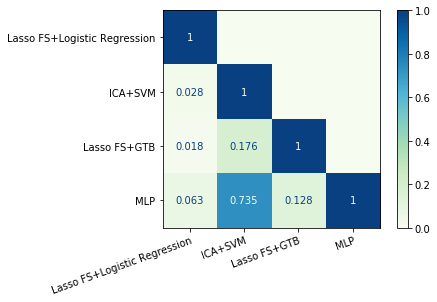

In [76]:
## Plot heatmap
labels = [key for key in mms_dict.keys()]

fig, ax = plt.subplots()
cax = ax.imshow(ps_values, cmap="GnBu")

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

cbar = ax.figure.colorbar(cax, ax=ax)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=20, ha="right",
         rotation_mode="anchor")
cmap_min, cmap_max = cax.cmap(0), cax.cmap(256)
thresh = 0.5

for i in range(4):
    for j in range(i+1):
        color = cmap_max if ps_values[i][j] < thresh else cmap_min
        ax.text(j, i, round(ps_values[i][j], 3), ha="center", va="center", color=color)

plt.show()

NameError: name 'im' is not defined

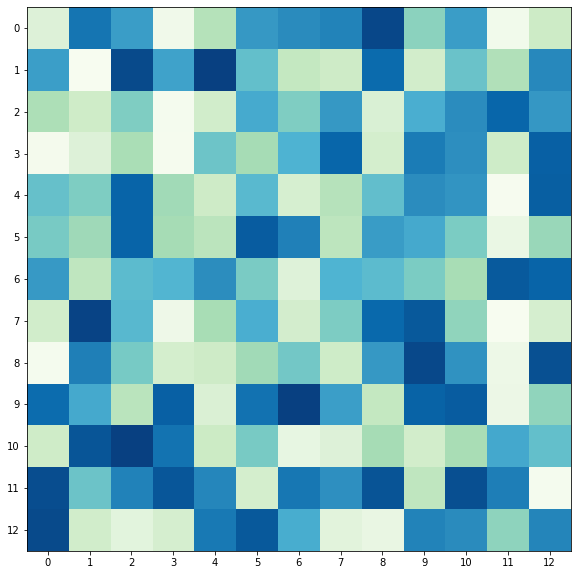

In [73]:
##see how heatmap of 13 comparisons look like
rand_data = []
for i in range(13):
    rand_data.append(np.random.uniform(0,1,13))

# labels = [key for key in mms_dict.keys()]

fig, ax = plt.subplots(figsize=(10,10))
cax = ax.imshow(rand_data, cmap="GnBu")

ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))

# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels)

cbar = ax.figure.colorbar(im, ax=ax)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=20, ha="right",
         rotation_mode="anchor")
cmap_min, cmap_max = cax.cmap(0), cax.cmap(256)
thresh = 0.5

for i in range(13):
    for j in range(13):
        color = cmap_max if rand_data[i][j] < thresh else cmap_min
        ax.text(j, i, round(rand_data[i][j], 3), ha="center", va="center", color=color)

plt.show()

In [5]:
all_precs = {
    "PCA+LR":[0.72, 0.7115384615384616, 0.72, 0.6792452830188679, 0.6727272727272727],
    "ICA+LR":[0.76, 0.7222222222222222, 0.7592592592592593, 0.75, 0.7],
    "UMAP+LR":[0.6486486486486487, 0.6756756756756757, 0.6521739130434783, 0.6829268292682927, 0.6666666666666666],
    "Lasso FS+LR":[0.7538461538461538, 0.7575757575757576, 0.74, 0.7575757575757576, 0.7424242424242424],
    "VAE+LR":[0.75, 0.75, 0.7727272727272727, 0.7547169811320755, 0.7962962962962963],
    "PCA+SVM":[0.7605633802816901, 0.7761194029850746, 0.7538461538461538, 0.7692307692307693, 0.7868852459016393],
    "ICA+SVM":[0.78, 0.7758620689655172, 0.7758620689655172, 0.7678571428571429, 0.7678571428571429],
    "UMAP+SVM":[0.673469387755102, 0.7636363636363637, 0.7142857142857143, 0.7307692307692307, 0.7727272727272727],
    "Lasso FS+SVM":[0.75, 0.7538461538461538, 0.75, 0.7575757575757576, 0.74],
    "VAE+SVM":[0.6756756756756757, 0.6571428571428571, 0.6470588235294118, 0.6521739130434783, 1.0],
     "PCA+GTB":[0.7313432835820896, 0.8214285714285714, 0.7540983606557377, 0.75, 0.7413793103448276],
    "ICA+GTB":[0.7307692307692307, 0.7, 0.7192982456140351, 0.8035714285714286, 0.7083333333333334],
    "UMAP+GTB":[0.7142857142857143, 0.75, 0.8181818181818182, 0.75, 0.5],
    "Lasso FS+GTB":[0.803030303030303, 0.8064516129032258, 0.7735849056603774, 0.7735849056603774, 0.75],
    "VAE+GTB":[0.7560975609756098, 0.75, 0.8, 0.813953488372093, 0.7857142857142857],
    "MLP":[0.775, 0.7857142857142857, 0.80104234, 0.7685714285714286, 0.719304347826086]
}

mms_dict = {}

for key in all_precs:
    ms = get_measurements(all_precs[key])
    mms_dict[key] = ms
print(mms_dict)


{'PCA+LR': array([0.7007022 , 0.02051941, 0.67272727, 0.67924528, 0.71153846,
       0.72      , 0.72      ]), 'ICA+LR': array([0.7382963 , 0.02354763, 0.7       , 0.72222222, 0.75      ,
       0.75925926, 0.76      ]), 'UMAP+LR': array([0.66521835, 0.01318905, 0.64864865, 0.65217391, 0.66666667,
       0.67567568, 0.68292683]), 'Lasso FS+LR': array([0.75028438, 0.00757053, 0.74      , 0.74242424, 0.75384615,
       0.75757576, 0.75757576]), 'VAE+LR': array([0.76474811, 0.01785829, 0.75      , 0.75      , 0.75471698,
       0.77272727, 0.7962963 ]), 'PCA+SVM': array([0.76932899, 0.01158357, 0.75384615, 0.76056338, 0.76923077,
       0.7761194 , 0.78688525]), 'ICA+SVM': array([0.77348768, 0.00483925, 0.76785714, 0.76785714, 0.77586207,
       0.77586207, 0.78      ]), 'UMAP+SVM': array([0.73097759, 0.03576447, 0.67346939, 0.71428571, 0.73076923,
       0.76363636, 0.77272727]), 'Lasso FS+SVM': array([0.75028438, 0.00586141, 0.74      , 0.75      , 0.75      ,
       0.75384615, 0.75757

In [6]:
pair_ps = {}
ps_values = []
c = 0
for key in mms_dict:
    p1 = key
    ps_values.append([0]*16)
    sub_c = 0
    for key in mms_dict:
        if key != p1:
            p2 = key
            stat, p = wilcoxon(mms_dict[p1], mms_dict[p2])
            pair_ps[p1+"_"+p2] = p
            if sub_c <= c:
                ps_values[c][sub_c] = p
            if p > 0.05:
                print(p1, 'and', p2, 'probably draw data from the same distribution')
            else:
                print(p1, 'and', p2, 'probably draw data from the different distribution')
                print()
        else:
            ps_values[c][sub_c] = 1.0
        sub_c += 1
    c += 1

print(pair_ps)
print(ps_values)

PCA+LR and ICA+LR probably draw data from the different distribution

PCA+LR and UMAP+LR probably draw data from the different distribution

PCA+LR and Lasso FS+LR probably draw data from the different distribution

PCA+LR and VAE+LR probably draw data from the different distribution

PCA+LR and PCA+SVM probably draw data from the different distribution

PCA+LR and ICA+SVM probably draw data from the different distribution

PCA+LR and UMAP+SVM probably draw data from the different distribution

PCA+LR and Lasso FS+SVM probably draw data from the different distribution

PCA+LR and VAE+SVM probably draw data from the same distribution
PCA+LR and PCA+GTB probably draw data from the different distribution

PCA+LR and ICA+GTB probably draw data from the different distribution

PCA+LR and UMAP+GTB probably draw data from the same distribution
PCA+LR and Lasso FS+GTB probably draw data from the different distribution

PCA+LR and VAE+GTB probably draw data from the different distribution

PCA+

Lasso FS+GTB and Lasso FS+LR probably draw data from the different distribution

Lasso FS+GTB and VAE+LR probably draw data from the different distribution

Lasso FS+GTB and PCA+SVM probably draw data from the different distribution

Lasso FS+GTB and ICA+SVM probably draw data from the same distribution
Lasso FS+GTB and UMAP+SVM probably draw data from the different distribution

Lasso FS+GTB and Lasso FS+SVM probably draw data from the different distribution

Lasso FS+GTB and VAE+SVM probably draw data from the same distribution
Lasso FS+GTB and PCA+GTB probably draw data from the same distribution
Lasso FS+GTB and ICA+GTB probably draw data from the different distribution

Lasso FS+GTB and UMAP+GTB probably draw data from the same distribution
Lasso FS+GTB and VAE+GTB probably draw data from the same distribution
Lasso FS+GTB and MLP probably draw data from the same distribution
VAE+GTB and PCA+LR probably draw data from the different distribution

VAE+GTB and ICA+LR probably draw da

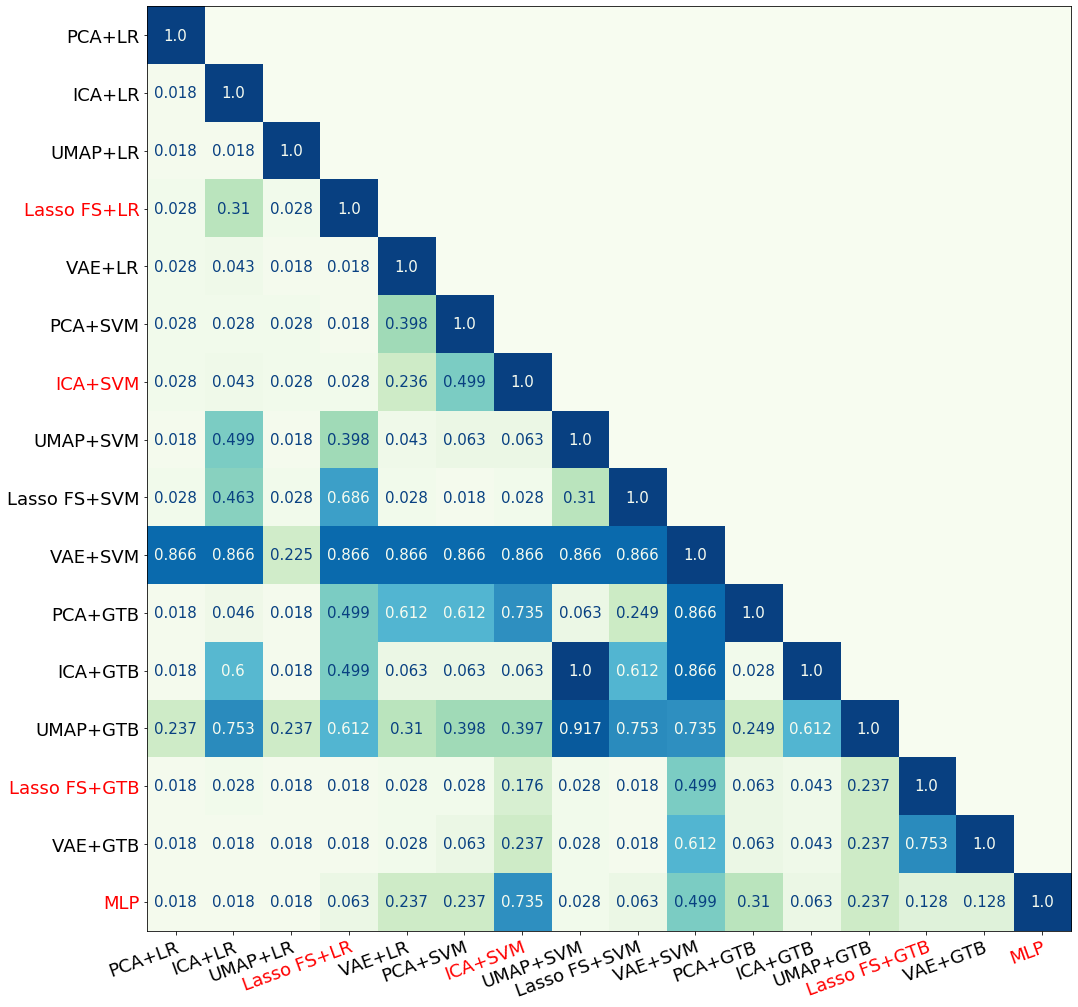

In [12]:
## Plot heatmap
labels = [key for key in mms_dict.keys()]

fig, ax = plt.subplots(figsize=(17,17))
cax = ax.imshow(ps_values, cmap="GnBu")

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 18)
ax.set_yticklabels(labels, fontsize = 18)

# cbar = ax.figure.colorbar(im, ax=ax)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=20, ha="right",
         rotation_mode="anchor")
cmap_min, cmap_max = cax.cmap(0), cax.cmap(256)
thresh = 0.5

for i in range(len(labels)):
    for j in range(i+1):
        color = cmap_max if ps_values[i][j] < thresh else cmap_min
        ax.text(j, i, round(ps_values[i][j], 3), ha="center", va="center", color=color, fontsize=15)

best_pipelines = ["Lasso FS+LR", "ICA+SVM", "Lasso FS+GTB","MLP"]
for l in ax.xaxis.get_ticklabels()+ax.yaxis.get_ticklabels():
    if l.get_text() in best_pipelines:
        l.set_color('r')

fig.savefig("all_sigtest.pdf", bbox_inches='tight')        
plt.show()

In [14]:
labellist = ax.xaxis.get_ticklabels()+ax.yaxis.get_ticklabels()
print(labellist)

[Text(0, 0, 'PCA+LR'), Text(1, 0, 'ICA+LR'), Text(2, 0, 'UMAP+LR'), Text(3, 0, 'Lasso FS+LR'), Text(4, 0, 'VAE+LR'), Text(5, 0, 'PCA+SVM'), Text(6, 0, 'ICA+SVM'), Text(7, 0, 'UMAP+SVM'), Text(8, 0, 'Lasso FS+SVM'), Text(9, 0, 'VAE+SVM'), Text(10, 0, 'PCA+GTB'), Text(11, 0, 'ICA+GTB'), Text(12, 0, 'UMAP+GTB'), Text(13, 0, 'Lasso FS+GTB'), Text(14, 0, 'VAE+GTB'), Text(15, 0, 'MLP'), Text(0, 0, 'PCA+LR'), Text(0, 1, 'ICA+LR'), Text(0, 2, 'UMAP+LR'), Text(0, 3, 'Lasso FS+LR'), Text(0, 4, 'VAE+LR'), Text(0, 5, 'PCA+SVM'), Text(0, 6, 'ICA+SVM'), Text(0, 7, 'UMAP+SVM'), Text(0, 8, 'Lasso FS+SVM'), Text(0, 9, 'VAE+SVM'), Text(0, 10, 'PCA+GTB'), Text(0, 11, 'ICA+GTB'), Text(0, 12, 'UMAP+GTB'), Text(0, 13, 'Lasso FS+GTB'), Text(0, 14, 'VAE+GTB'), Text(0, 15, 'MLP')]


## Outperformance heatmap

In [8]:
def get_outperform(precs1, precs2):
    diff = np.subtract(precs1, precs2)
    n = len(diff[diff > 0.01])
#     print(n)
    return round(n/5, 2)


In [9]:
op_values = []
for key in all_precs:
    p1 = key
    for key in all_precs:
        p2 = key
        op_values.append(get_outperform(all_precs[p1], all_precs[p2]))
op_values = np.array(op_values).reshape((len(all_precs.keys()), -1))
op_values

array([[0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0.2, 0.2,
        0. , 0. , 0. ],
       [1. , 0. , 1. , 0.2, 0.2, 0. , 0. , 0.6, 0.2, 0.8, 0.2, 0.6, 0.4,
        0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0.2,
        0. , 0. , 0. ],
       [1. , 0.4, 1. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.8, 0.2, 0.8, 0.4,
        0. , 0. , 0.2],
       [1. , 0.6, 1. , 0.4, 0. , 0.2, 0.2, 0.8, 0.4, 0.8, 0.6, 0.8, 0.4,
        0.2, 0.2, 0.2],
       [1. , 0.6, 1. , 0.8, 0.6, 0. , 0.2, 1. , 0.8, 0.8, 0.6, 0.8, 0.8,
        0.2, 0.2, 0.2],
       [1. , 1. , 1. , 1. , 0.6, 0.4, 0. , 0.8, 1. , 0.8, 0.8, 0.8, 0.8,
        0.2, 0.4, 0.2],
       [0.6, 0.4, 1. , 0.2, 0.2, 0. , 0. , 0. , 0.2, 0.6, 0.2, 0.4, 0.4,
        0.2, 0.2, 0.2],
       [1. , 0.4, 1. , 0.2, 0. , 0. , 0. , 0.6, 0. , 0.8, 0.2, 0.8, 0.4,
        0. , 0. , 0.2],
       [0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2],
       [1. , 0.4, 1. , 0.4, 0.

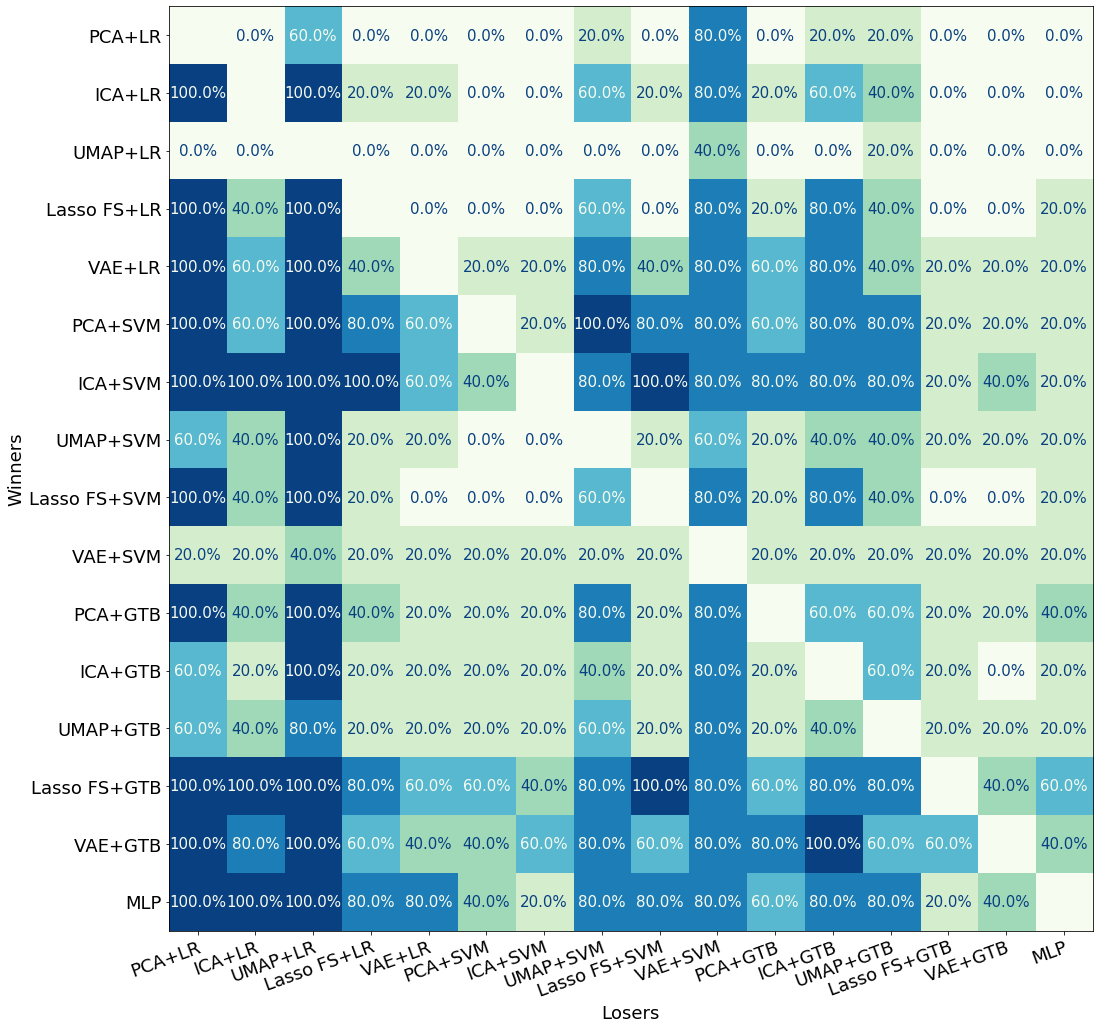

In [11]:
## Plot heatmap
labels = [key for key in all_precs.keys()]

fig, ax = plt.subplots(figsize=(17,17))
cax = ax.imshow(op_values, cmap="GnBu")

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 18)
ax.set_yticklabels(labels, fontsize = 18)

# cbar = ax.figure.colorbar(im, ax=ax)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=20, ha="right",
         rotation_mode="anchor")
cmap_min, cmap_max = cax.cmap(0), cax.cmap(256)
thresh = 0.5

for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j:
            color = cmap_max if op_values[i][j] < thresh else cmap_min
            ax.text(j, i, str(op_values[i][j]*100)+"%", ha="center", va="center", color=color, fontsize=15)

plt.xlabel('Losers', fontsize=18)
plt.ylabel('Winners', fontsize=18)
fig.savefig("outperf.pdf", bbox_inches='tight')
plt.show()